In [286]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

sns.set_theme()

# Data Filtering

First we import the dataset
Look at its structure and filter out my state's data (Madhya Pradesh)

In [287]:
dataset = pd.read_csv("clustering_data.csv", low_memory=False)

In [288]:
# Looking at dataset info
dataset.info()

# Finding the string to filter by
print("\n\n", dataset["StateName"].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157126 entries, 0 to 157125
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   CircleName    157126 non-null  object
 1   RegionName    157073 non-null  object
 2   DivisionName  157124 non-null  object
 3   OfficeName    157126 non-null  object
 4   Pincode       157126 non-null  int64 
 5   OfficeType    157126 non-null  object
 6   Delivery      157126 non-null  object
 7   District      157126 non-null  object
 8   StateName     157126 non-null  object
 9   Latitude      148288 non-null  object
 10  Longitude     148283 non-null  object
dtypes: int64(1), object(10)
memory usage: 13.2+ MB


 ['ANDHRA PRADESH' 'BIHAR' 'TELANGANA' 'RAJASTHAN' 'PUNJAB' 'ASSAM'
 'UTTAR PRADESH' 'KARNATAKA' 'MADHYA PRADESH' 'JHARKHAND' 'ODISHA'
 'MAHARASHTRA' 'GUJARAT' 'CHHATTISGARH' 'TAMIL NADU' 'WEST BENGAL'
 'HIMACHAL PRADESH' 'HARYANA' 'KERALA' 'DELHI' 'JAMMU AND KASHMIR'
 'MEGHA

From that list, we can see that we want to filter the columns where the state name is 'MADHYA PRADESH'

We can also see that the latitude and longitude columns are strings instead of numeric types, we will investigate that in a bit

In [289]:
dataset = dataset[dataset["StateName"] == "MADHYA PRADESH"]

# Looking at the entries
dataset.head()

,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude
554,Madhya Pradesh Circle,Jabalpur Region,Chhatarpur Division,Kudar B.O,472445,BO,Delivery,Niwari,MADHYA PRADESH,24.7931,80.1856
555,Madhya Pradesh Circle,Jabalpur Region,Chhatarpur Division,Bhitari B.O,472445,BO,Delivery,Niwari,MADHYA PRADESH,25.8795,78.7026
556,Madhya Pradesh Circle,Jabalpur Region,Chhatarpur Division,Shaktibheron B.O,472445,BO,Delivery,Niwari,MADHYA PRADESH,25.3956,79.2631
2474,Madhya Pradesh Circle,Jabalpur Region,Satna Division,Barsobha B.O,488059,BO,Delivery,PANNA,MADHYA PRADESH,24.5708,80.1763
2475,Madhya Pradesh Circle,Jabalpur Region,Satna Division,Deoriranwana B.O,488059,BO,Delivery,PANNA,MADHYA PRADESH,24.5708,80.1763


Now before we can do anything with this data, we need to convert the latitudes and longitudes to a floating point datatype.
Unfortunately, it contains NaN values and also some strings that end in "-" as is demonstrated below.

Since we can't be sure why exactly these errors occured, and since we have enough datapoints even without these few lines, I've decided to just drop them rather than try to correct them in any way.

In [290]:
print("Rows with NaN values:")
display(dataset[dataset["Longitude"].isna()])

# We just drop rows with NA values
dataset.dropna(inplace=True)

Rows with NaN values:


,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude
14012,Madhya Pradesh Circle,DivReportingCircle,Vidisha Division,Panjra B.O,464770,BO,Delivery,RAISEN,MADHYA PRADESH,NaN,NaN
68611,Madhya Pradesh Circle,Jabalpur Region,Balaghat Division,Sihora BO,480882,BO,Delivery,SEONI,MADHYA PRADESH,NaN,NaN
142153,Madhya Pradesh Circle,Indore Region,Indore City Division,Indore Nipaniya SO,452010,PO,Non Delivery,INDORE,MADHYA PRADESH,NaN,NaN


In [291]:
print("Example Rows with - at the end of Latitude or Longitude:")
display(dataset[dataset["Longitude"].str.endswith("-") | dataset["Latitude"].str.endswith("-")].head())

# We just drop rows with this issue
dataset.drop(dataset[dataset["Longitude"].str.endswith("-") | dataset["Latitude"].str.endswith("-")].index, inplace=True)

Example Rows with - at the end of Latitude or Longitude:


,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude
45920,Madhya Pradesh Circle,Indore Region,Ujjain Division,Uchod B.O,465223,BO,Delivery,SHAJAPUR,MADHYA PRADESH,44.526342,109.0565300-
46006,Madhya Pradesh Circle,Indore Region,Ujjain Division,Ladavad B.O,465220,BO,Delivery,SHAJAPUR,MADHYA PRADESH,29.692478,91.1561390-
49995,Madhya Pradesh Circle,Indore Region,Indore Moffusil Division,Tawlai B.O,454449,BO,Delivery,DHAR,MADHYA PRADESH,10.2683030-,150.774822
49997,Madhya Pradesh Circle,Indore Region,Indore Moffusil Division,Zirvi B.O,454449,BO,Delivery,DHAR,MADHYA PRADESH,40.677213,74.4117760-
49998,Madhya Pradesh Circle,Indore Region,Indore Moffusil Division,Kod B.O,454665,BO,Delivery,DHAR,MADHYA PRADESH,25.9387,80.1955130-


Now we can convert the Latitude and Longitude columns to numeric types!

In [292]:
dataset["Latitude"] = dataset["Latitude"].astype(np.float32)
dataset["Longitude"] = dataset["Longitude"].astype(np.float32)

dataset.describe()

,Pincode,Latitude,Longitude
count,8201.000000,8201.000000,8201.000000
mean,471017.965370,24.281136,78.569817
std,11687.080367,5.549601,90.627838
min,450001.000000,0.103623,0.015757
25%,460551.000000,22.750650,76.420097
50%,472246.000000,23.719389,78.335861
75%,481666.000000,24.600000,79.974167
max,488448.000000,256.028412,8256.000000


It is clear that there are some pretty crazy outliers in the latitude and longitude data.

To start of with, we can apply some domain knowledge here. 
We know that the latitude of India spans from 8.067 to 37.1 and that its longitude spans from 68.1167 to 95.4167

So we'll first just drop those outright, considering it to be due to the malice of the Epoch cores.
Then we'll again filter out outliers by dropping anything outside 2 standard deviations of the mean.

In [293]:
# Dropping any samples that are literally outside the nation
dataset.drop(
    dataset[
        (dataset["Longitude"] > 95.4167) | 
        (dataset["Longitude"] < 68.1167) | 
        (dataset["Latitude"] < 8.067) |
        (dataset["Latitude"] > 37.1)
    ].index, 
    inplace=True
)

dataset.describe()

,Pincode,Latitude,Longitude
count,8046.000000,8046.000000,8046.000000
mean,471016.891623,23.810184,78.350937
std,11698.111746,1.773843,2.413838
min,450001.000000,8.273984,68.312218
25%,460474.500000,22.744110,76.534733
50%,472246.000000,23.690001,78.374676
75%,481668.000000,24.579000,79.990891
max,488448.000000,35.675148,91.995003


In [294]:
# Dropping any samples that are outside 2 standard deviations of the mean
dataset.drop(
    dataset[
        ((dataset["Longitude"]-dataset["Longitude"].mean()).abs() > 2*dataset["Longitude"].std()) | 
        ((dataset["Latitude"]-dataset["Latitude"].mean()).abs() > 2*dataset["Latitude"].std())
    ].index, 
    inplace=True
)

dataset.describe()

,Pincode,Latitude,Longitude
count,7579.000000,7579.000000,7579.000000
mean,471226.357831,23.757524,78.348770
std,11735.108637,1.376996,2.103922
min,450001.000000,20.273184,73.531441
25%,460661.000000,22.760000,76.679405
50%,473101.000000,23.670000,78.432564
75%,481885.000000,24.579000,79.970745
max,488448.000000,27.228498,83.152840


Thats a much more reasonable distribution. Now lets try plotting it in a scatter plot

# Data Visualization

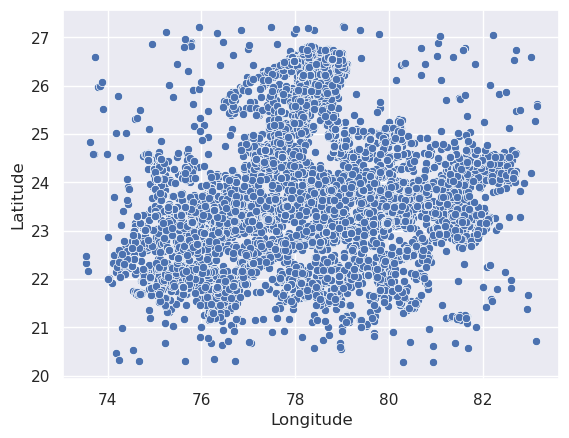

In [295]:
lat = dataset["Latitude"]
long = dataset["Longitude"]

# Basic scatterplot of remaining points
sns.scatterplot(x=long, y=lat)
plt.show()

# Sike! Data filtering again

That's got somewhat the shape of Madhya Pradesh, but it looks like theres a lot of points from outside the state.
Since most of them are sparse, let us do a final filtering by filtering out points that don't have atleast 3 points within a 0.05 radius.



In [296]:
def density_filter(df, radius, threshold):
    # For the density-based filtering cell:
    i, d = df.index, df.loc[:,("Longitude","Latitude")].to_numpy()

    # Calculate euclidean distance matrix between all points, add identity matrix to avoid self-counting
    # Count points within radius for each point
    n_neighbours = pd.DataFrame(((((d[:, np.newaxis, :] - d[np.newaxis, :, :])**2).sum(axis=2)+np.eye(len(d))*10)<radius).sum(axis=1), index=i)

    # Drop all points which do not satisfy the requirement
    df.drop(df.index[n_neighbours.loc[:,0]<=threshold], inplace=True)

In [ ]:
# Dropping points which don't have atleast 3 points withing 0.05 radius
density_filter(dataset, 0.05, 2)

# Updating the copies we are using for plotting
lat = dataset["Latitude"]
long = dataset["Longitude"]

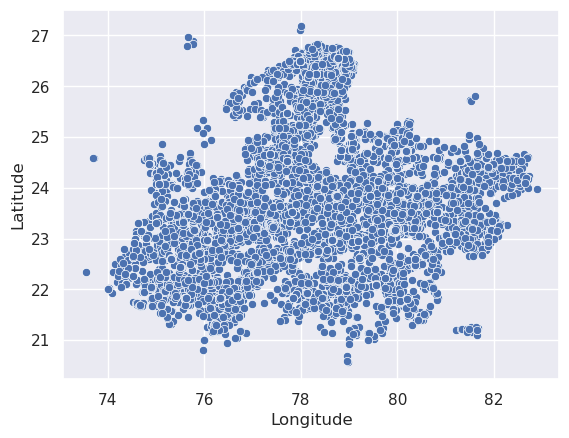

In [298]:
sns.scatterplot(x=long, y=lat)
plt.show()

Great!, There are a few clusters outside but it's mostly pretty clean. Now Lets try plotting it over an actual map (data visualization)

Map Image credit:
All map images are from [D-Maps](d-maps.com)

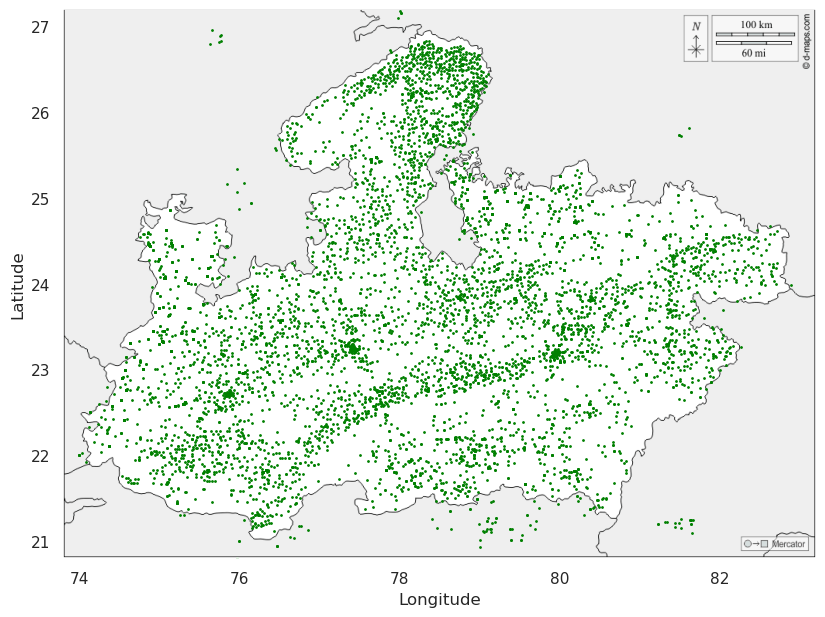

In [ ]:
bg = plt.imread("./Madhya_Pradesh.gif")

# Removing points that would lie outside the BG image
dataset.drop(
    dataset.index[
        ~dataset["Longitude"].between(73.8,83.2) | ~dataset["Latitude"].between(20.8,27.2)
    ],
    inplace=True
)
long = dataset["Longitude"]
lat = dataset["Latitude"]

plt.figure(figsize=(9.71,7.13))
plt.imshow(bg, aspect="auto", extent=(73.8,83.2,20.8,27.2), alpha=1, zorder=1) # Image fit by good ol' trial and error.
plt.scatter(long, lat, s=1, c="green", alpha=1)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

Now, I **have not** matched up the image to the actual latitudes and longitudes. So this doesn't actually say much. But it does confirm that the points follow the shape of Madhya Pradesh.

Enough fooling around though, lets get clustering.

# Clustering Analysis

In [ ]:
def k_means_clustering(data, k, max_iter = 10, rtol=1e-3, group_data=False):

    # Seeding - Take K random points
    indices = np.random.choice(len(data), size=k, replace=False)
    centres = data[indices].astype(dtype=np.float64)
    converged = False
    iteration = 0

    # Updating based on K means algorithm
    while not converged and iteration < max_iter:

        # Calculate all the point-centre pair distances
        distances = np.hstack([np.sum((data-centre)**2, axis=1).reshape(-1,1) for centre in centres])

        # Assign each point to a cluster
        mapping = np.argmin(distances, axis=1)

        # Update every centre to be the mean of the points assigned to it,
        # Or replace it with a random point if no points are assigned to it
        converged = True
        for i in range(k):
            if len(data[mapping == i]) > 0:
                new_centre = data[mapping == i].mean(axis=0)
            else:
                new_centre = data[np.random.choice(len(data))]

            if converged: converged &= np.allclose(centres[i], new_centre, rtol=rtol)
            centres[i] = new_centre


        iteration += 1

    # Calculate and return the cluster of each point as well as the overall loss if required
    if group_data:
        temp = ((data[:, np.newaxis, :] - centres[np.newaxis, :, :])**2).sum(axis=2)
        groups = temp.argmin(axis=1)
        loss = np.sqrt(temp.min(axis=1)).mean()
        return (centres, groups, loss)
    else:
        return centres

Now since the points are so spread out and don't really have a noticeable clusters, one would expect the plot of loss vs. K to not have a very sharp elbow. Let's see what it's actually like

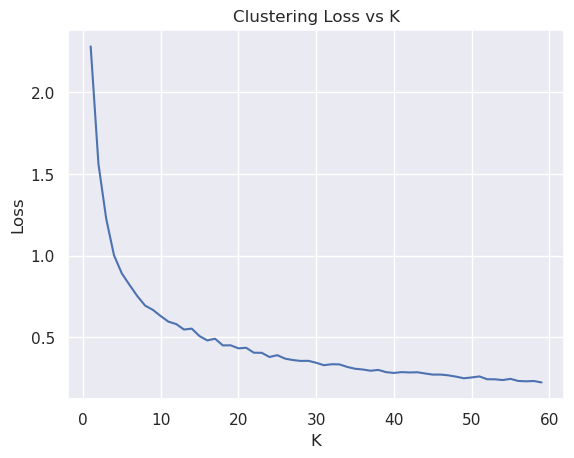

In [ ]:
losses = []
k_values = np.array(range(1,60))

# Attempt clustering at all values of k in range of interest, and keep track of the losses.
for k in k_values:
    _, _, loss = k_means_clustering(
        dataset.loc[:, ("Latitude","Longitude")].to_numpy(),
        k=k, 
        max_iter=100, 
        group_data=True
    )

    losses.append(loss)

# Plotting the loss curve
plt.plot(k_values, losses)
plt.title("Clustering Loss vs K")
plt.ylabel("Loss")
plt.xlabel("K")
plt.show()

Yup, the elbow isn't sharp. So it's not immediately clear what K to use.

We'll use the K at which the slope stops changing, which also **conveniently happens to be about the number of significant regions in the state**. 

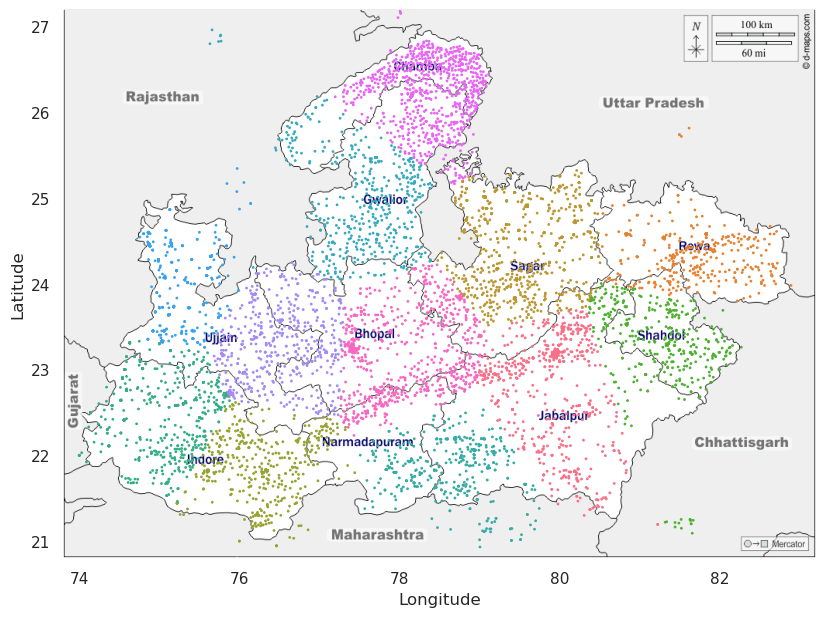

In [ ]:
# Do the actual clustering
np.random.seed(42)
centres, groups, _ = k_means_clustering(
    dataset.loc[:, ("Latitude","Longitude")].to_numpy(),
    k=12, 
    max_iter=100, 
    group_data=True
)

bg = plt.imread("MP_Regions.gif")

# Using seaborn's pallete to make it look prettier
palette = sns.color_palette("husl", len(centres)).as_hex()
colors = list(map(lambda x: palette[x], groups))

plt.figure(figsize=(9.71,7.13))
plt.imshow(bg, aspect="auto", extent=(73.8,83.2,20.8,27.2), alpha=1, zorder=1)
plt.scatter(long, lat, s=1, c=colors, alpha=1)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

It is interesting to see that the clustering is actually not that far off from the actual large regions of Madhya Pradesh.
A few regions got broken into two clusters. But even then, those two clusters together match the region pretty well
The only parts where the clustering doesn't match the regions by a long shot is Chamba in the Northmost part. Which makes sense as our proximity metric was euclidean and Chamba is spread along a line rather than roundly, So it makes sense that K Means would do a bad job there.

# Trying to find Cities by clustering

Directly applying clustering and hoping that the centres end up at the Major cities, won't work because the the cities make only a fraction of the datapoints in the dataset. We can however, first filter out points by density, and then apply K means to classify points into major cities (The clusters found) or outskirts/rural ones (Those that got filtered out)

We will achieve this filtering just by performing a more aggressive version of the filtering we used to remove points from outside the state

In [ ]:
# Filter out any points with 10 or less points in a 0.01 radius
density_filter(dataset, radius=0.01, threshold=10)

lat = dataset["Latitude"]
long = dataset["Longitude"]

We'll Again generate an elbow graph to find the number of clusters we should be looking for

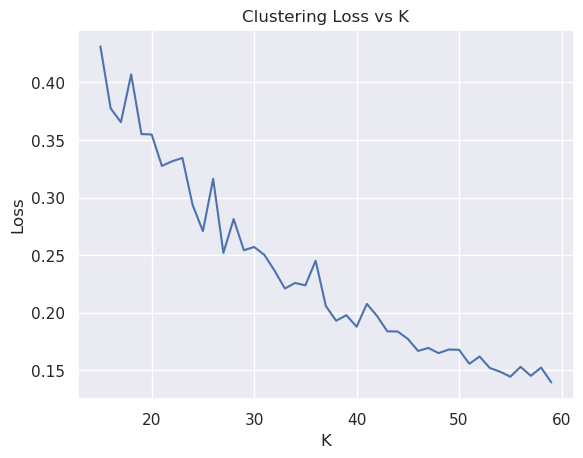

In [ ]:
losses = []
k_values = np.array(range(15,60))

# Attempt clustering at all values of k in range of interest, and keep track of the losses.
for k in k_values:
    _, _, loss = k_means_clustering(
        dataset.loc[:, ("Latitude","Longitude")].to_numpy(),
        k=k, 
        max_iter=100, 
        group_data=True
    )

    losses.append(loss)

plt.plot(k_values, losses)
plt.title("Clustering Loss vs K")
plt.ylabel("Loss")
plt.xlabel("K")
plt.show()

Alright, Let's try clustering with K=39

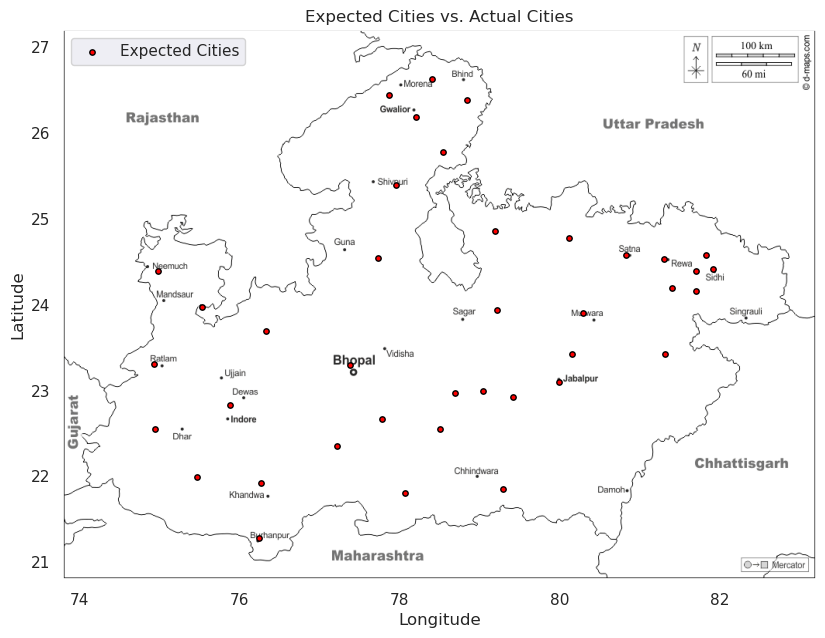

In [ ]:
# Do the actual clustering
np.random.seed(42)
centres, groups, _ = k_means_clustering(
    dataset.loc[:, ("Latitude","Longitude")].to_numpy(),
    k=39, 
    max_iter=100, 
    group_data=True
)

bg = plt.imread("MP_Cities.gif")

# Plot the centres of the clusters over the city map
plt.figure(figsize=(9.71,7.13))
plt.imshow(bg, aspect="auto", extent=(73.8,83.2,20.8,27.2), alpha=1, zorder=1)
plt.scatter(centres[:,1], centres[:,0], s=15, edgecolors="black", c="red", label="Expected Cities")
plt.legend(loc="upper left")
plt.title("Expected Cities vs. Actual Cities")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

We can see that It got quite a few places spot on or very close. 
e.g Bhopal, Indore, Satna, Rewa, Gwalior just to name a few

There's also a lot of centres in completely unlabelled areas. Unfortunately I don't have a map with better city detail, But perhaps theres smaller towns there. It would make sense for towns to show up when we're looking for cities cause Madhya Pradesh isn't that developed outside a few major cities.

We can however confirm that hypothesis by plotting this over a road map instead, since one would imagine the major towns would still lie on/near major roads

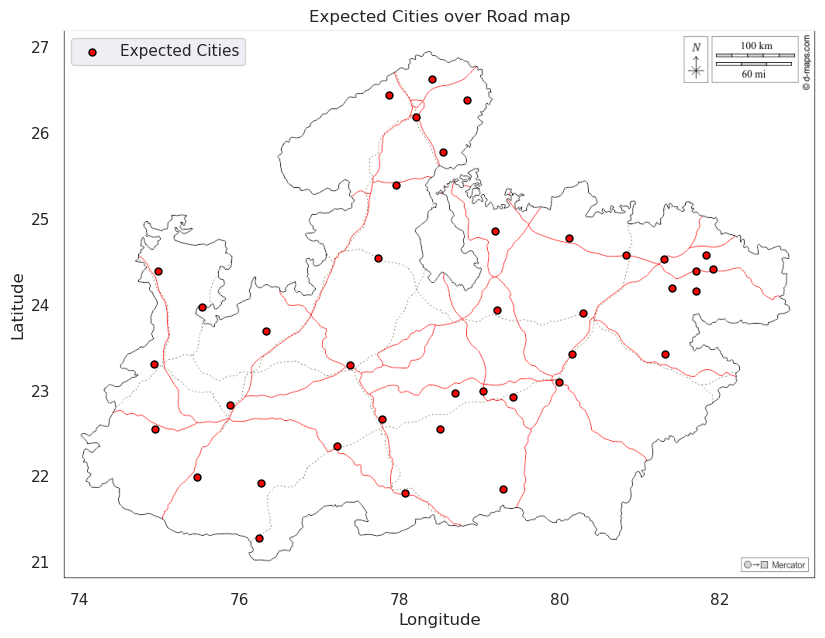

In [ ]:
bg = plt.imread("MP_Roads.gif")

# Plot the expected cities over the road map
plt.figure(figsize=(9.71,7.13))
plt.imshow(bg, aspect="auto", extent=(73.8,83.2,20.8,27.2), alpha=1, zorder=1)
plt.scatter(centres[:,1], centres[:,0], s=25, edgecolors="black", c="red", label="Expected Cities")
plt.legend(loc="upper left")
plt.title("Expected Cities over Road map")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

And yeah! Looks like most of our suspected cities lie on or near a major road.
There are only 4 out of the 39 that are both, not on the major cities map and no where close to a major road, and I don't know why that is, maybe my filtering wasn't great. But I think 90% is a pretty good accuracy.